In [33]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
Nc = 10 # Size of cavity Fock space
Nm = 20 # Size of mechanical Fock space
a = qt.tensor(qt.destroy(Nc), qt.qeye(Nm)) # Annihilation operator on fock space
b = qt.tensor(qt.qeye(Nc), qt.destroy(Nm))

In [35]:
# Define all energy scales relative to hbar omega_c so the hamiltonian is given by H/hbar*omega_c
omega_c = 1.0
omega_m = 0.005
g0 = 0.15
omega_drive = omega_c-omega_m

A_drive = 0.000001

kappa = 0.0001
Qm = 1e6
gamma = 1/Qm
n_th = 5

In [36]:
maxtime = 50 # Specified in periods of the driver 
tres = 20 # Specified in terms of the drive period
tlist = np.linspace(0, maxtime*(2*np.pi/g0), tres*maxtime+1) # maxtime and t resolution

In [37]:
Hc = omega_m*(a.dag()*a)
Hm = omega_m*(b.dag()*b)
Hint = g0*(a+a.dag())*(b+b.dag())
H0 = Hc + Hm + Hint

Hdrive1_coeff = A_drive*np.exp(1.0j*omega_drive*tlist)
Hdrive2_coeff = A_drive*np.exp(-1.0j*omega_drive*tlist)

H = [H0,[a,Hdrive1_coeff],[a.dag(),Hdrive2_coeff]]

In [38]:
cc = np.sqrt(kappa)*a
cm = np.sqrt(gamma*(1.0 + n_th))*b
cp = np.sqrt(gamma*n_th)*b.dag()
c_ops = [cc,cm,cp]

In [39]:
rho0 = qt.tensor(qt.fock_dm(Nc,0),qt.thermal_dm(Nm,n_th))

In [40]:
result = qt.mesolve(H0, rho0, tlist, c_ops, [], progress_bar=True)

10.1%. Run time:  26.01s. Est. time left: 00:00:03:51
20.1%. Run time:  65.25s. Est. time left: 00:00:04:19
30.1%. Run time: 110.18s. Est. time left: 00:00:04:16
40.1%. Run time: 153.64s. Est. time left: 00:00:03:49
50.0%. Run time: 194.29s. Est. time left: 00:00:03:13
60.0%. Run time: 236.29s. Est. time left: 00:00:02:37
70.0%. Run time: 287.04s. Est. time left: 00:00:02:02
80.0%. Run time: 344.71s. Est. time left: 00:00:01:26
90.0%. Run time: 403.25s. Est. time left: 00:00:00:44
Total run time: 452.60s


In [68]:
xvec = np.linspace(-10,10,200)
W = qt.wigner(result.states[2*tres].ptrace(0),xvec,xvec)

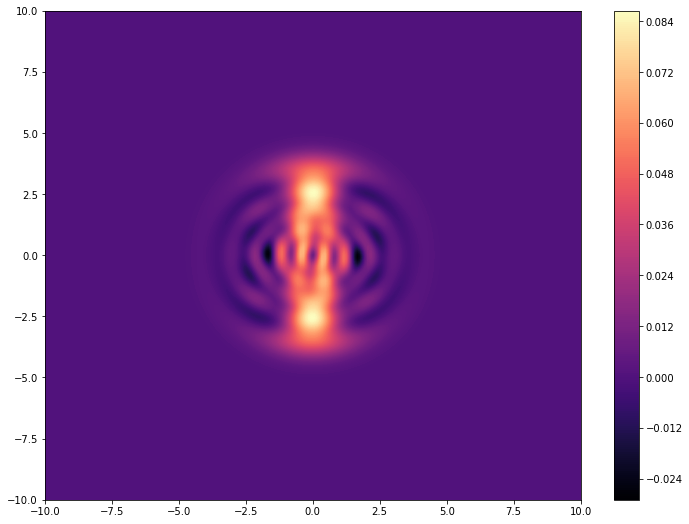

In [69]:
plt.figure(figsize=(12,9))
X,Y = np.meshgrid(xvec,xvec)
plt.contourf(X,Y,W,256,cmap='magma')
plt.colorbar();